In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import warnings
warnings.simplefilter('ignore')

In [60]:
#Intro/Background
#This data comes from a local high school in an urban community. The community has industries to work 
#in but are fairly limited in the variety of them. The students are the makeup of this background. 
#The community is poor and not much higher levels of education in the population. 
#The data was cleaned well and contained few errors. 
#The data was striped of identifying characteristics and racial backgrounds were placed into categories as 
#Group A, B, C, D, E. Parental level of education is used as a proxy for income level of homes, 
#but it can’t be determined in parents have parent is using the degree or in some state of transition.
#There is a free or standard lunch category. Whether or not the student took a prep course for testing 
#which was offered at the school. They may have taken a prep course outside of this, 
#but it is not included in the data. 
#The test was taken by all students because the school makes in a big point of interest 
#to make sure every student takes the test. The school district is graded on how 
#many students take the test so it will go great lengths to make sure the students will take the test. 
#The data came from the school, so it was cleaned before I received it. 
#While it was striped of certain things like names and other identifying marks,
#it was also cleaned of outliers for the most part. 


In [3]:
passmark = 50

In [4]:
df = pd.read_csv("ssh.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print (df.shape)

(1115, 8)


In [7]:
df.describe()

,math score,reading score,writing score
count,1115.000000,1115.000000,1115.000000
mean,66.155157,69.268161,68.143498
std,15.150892,14.639069,15.078461
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,78.000000
max,100.000000,100.000000,100.000000


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
###Number of students who passed math exam###
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    964
F    151
Name: Math_PassStatus, dtype: int64

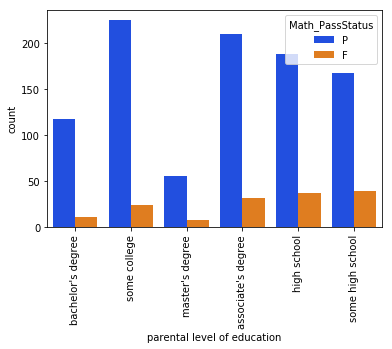

In [10]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [11]:
###How many passed the reading exam###
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    1016
F      99
Name: Reading_PassStatus, dtype: int64

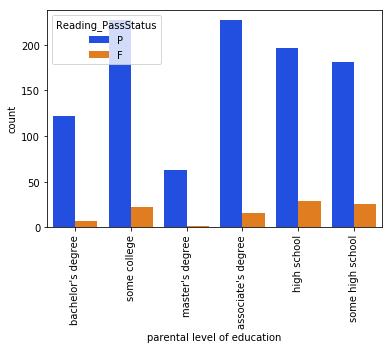

In [12]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [13]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    992
F    123
Name: Writing_PassStatus, dtype: int64

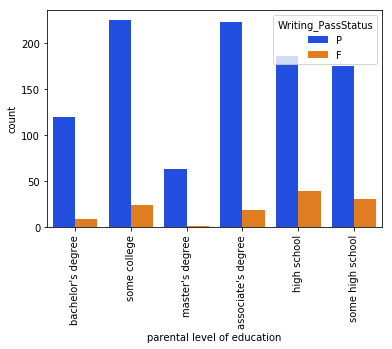

In [14]:
###How many students passed writing exam###
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [15]:
##How many passed all subjects###
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    911
F    204
Name: OverAll_PassStatus, dtype: int64

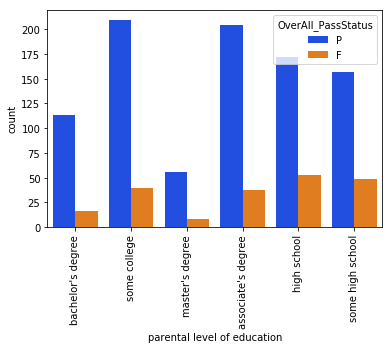

In [16]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [19]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [21]:
### Let us assign the grades
#Grading
#above 80 = A Grade
#70 to 80 = B Grade
#60 to 70 = C Grade
#50 to 60 = D Grade
#40 to 50 = E Grade
#below 40 = F Grade ( means Fail )
###

def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    289
C    285
A    225
F    204
D    112
Name: Grade, dtype: int64

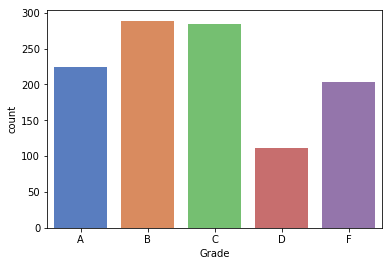

In [23]:
##plot grades in descending order
sns.countplot(x="Grade", data = df, order=['A','B','C','D','F'],  palette="muted")
plt.show()

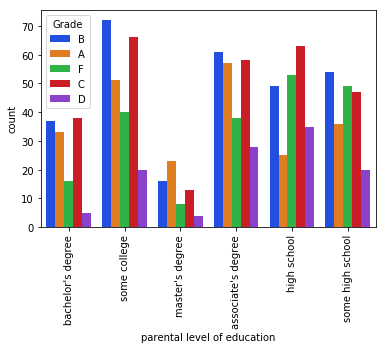

In [24]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [25]:
sp_data = df

In [26]:
for column in (sp_data.columns.values):
    if (sp_data[column].dtype) != np.dtype('int'):
        print ("Unique values in '"+ column + "' column are ", end='')
        print (sp_data[column].unique())

Unique values in 'gender' column are ['female' 'male']
Unique values in 'race/ethnicity' column are ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in 'parental level of education' column are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in 'lunch' column are ['standard' 'free/reduced']
Unique values in 'test preparation course' column are ['none' 'completed']
Unique values in 'math score' column are [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique values in 'reading score' column are [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41 

female    574
male      541
Name: gender, dtype: int64


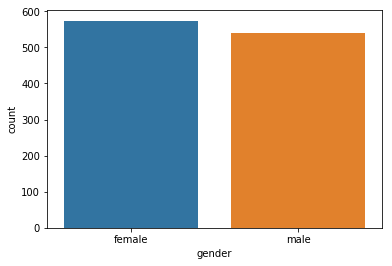

In [27]:
print (sp_data['gender'].value_counts())
sns.countplot(x='gender', data=sp_data);

group C    348
group D    295
group B    211
group E    161
group A    100
Name: race/ethnicity, dtype: int64


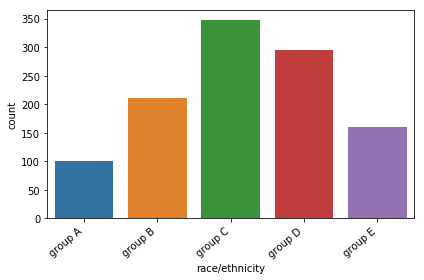

In [28]:
#Racial Information 
print (sp_data['race/ethnicity'].value_counts())
ax = sns.countplot(x='race/ethnicity', data=sp_data, order= ['group A', 'group B', 'group C', 'group D', 'group E'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

some college          249
associate's degree    242
high school           225
some high school      206
bachelor's degree     129
master's degree        64
Name: parental level of education, dtype: int64


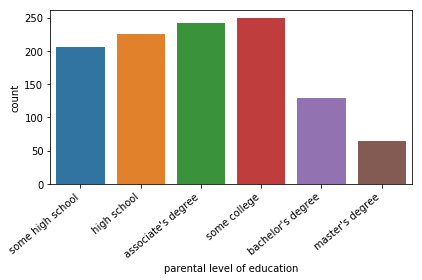

In [29]:
#Parental Education
print (sp_data['parental level of education'].value_counts())
ax = sns.countplot(x='parental level of education', data=sp_data, order=['some high school', 'high school', 'associate\'s degree', 'some college',
                                                                         "bachelor's degree","master's degree"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

standard        710
free/reduced    405
Name: lunch, dtype: int64


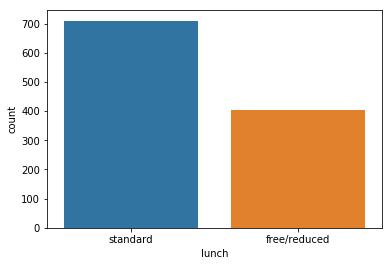

In [30]:
#Lunch free or not
print (sp_data['lunch'].value_counts())
sns.countplot(x='lunch', data=sp_data);

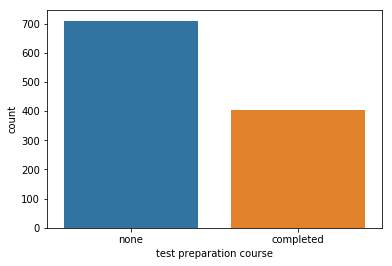

In [31]:
#If they took exam prep course
sns.countplot(x='test preparation course', data=sp_data);

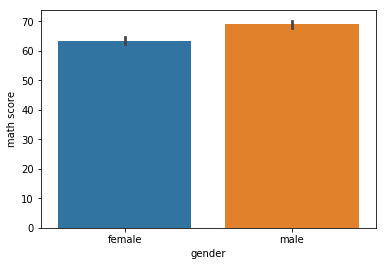

In [32]:
sns.barplot(x='gender',y='math score',data=sp_data);

In [33]:
sp_data[['math score','reading score','writing score']].describe()

,math score,reading score,writing score
count,1115.000000,1115.000000,1115.000000
mean,66.155157,69.268161,68.143498
std,15.150892,14.639069,15.078461
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,78.000000
max,100.000000,100.000000,100.000000


In [35]:
sp_data['gender'].loc[sp_data['gender'] == 'male'] = 1
sp_data['gender'].loc[sp_data['gender'] == 'female'] = 0

In [36]:
sp_data['race/ethnicity'].loc[sp_data['race/ethnicity'] == 'group A'] = 1
sp_data['race/ethnicity'].loc[sp_data['race/ethnicity'] == 'group B'] = 2
sp_data['race/ethnicity'].loc[sp_data['race/ethnicity'] == 'group C'] = 3
sp_data['race/ethnicity'].loc[sp_data['race/ethnicity'] == 'group D'] = 4
sp_data['race/ethnicity'].loc[sp_data['race/ethnicity'] == 'group E'] = 5

In [37]:
# sp_data['lunch'].loc[sp_data['lunch'] == 'standard'] = 1
# sp_data['lunch'].loc[sp_data['lunch'] == 'free/reduced'] = 0


# MData["test preparation course"]=MData["test preparation course"].replace({"none":0,"completed":1})

sp_data['lunch'] = sp_data['lunch'].replace({'standard':1,'free/reduced':0})

In [38]:
sp_data['test preparation course'].loc[sp_data['test preparation course'] == 'none'] = 0
sp_data['test preparation course'].loc[sp_data['test preparation course'] == 'completed'] = 1

In [39]:
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'some high school'] = 1
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'high school'] = 2
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'associate\'s degree'] = 3
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'some college'] = 4
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'bachelor\'s degree'] = 5
sp_data['parental level of education'].loc[sp_data['parental level of education'] == 'master\'s degree'] = 6

In [48]:
sp_data.drop(['Total_Marks', 'Percentage', 'Grade', 'Math_PassStatus', 'Reading_PassStatus', 'Writing_PassStatus', 'OverAll_PassStatus'], axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,5,1,0,72,72,74
1,0,3,4,1,1,69,90,88
2,0,2,6,1,0,90,95,93
3,1,1,3,0,0,47,57,44
4,1,3,4,1,0,76,78,75
5,0,2,3,1,0,71,83,78
6,0,2,4,1,1,88,95,92
7,1,2,4,0,0,40,43,39
8,1,4,2,0,1,64,64,67
9,0,2,2,0,0,38,60,50


averages: 
        math score  reading score  writing score
gender                                          
0        63.444251      72.601045      72.397213
1        69.031423      65.731978      63.630314


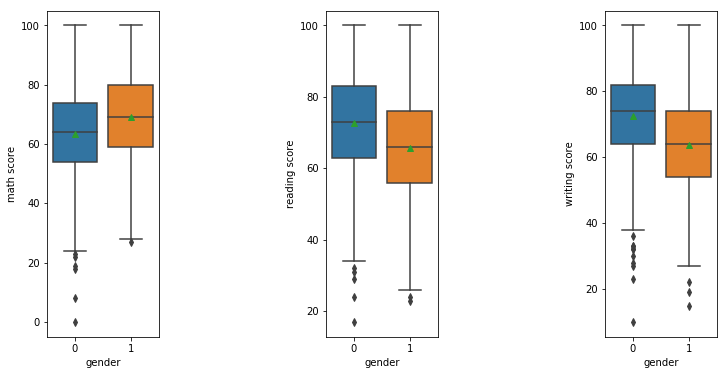

In [52]:
sp_score_data = sp_data[['gender','math score','reading score','writing score']].groupby('gender',as_index=True).mean()
print ('averages: \n'+str(sp_score_data.head()))
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="gender", y="math score", data=sp_data, ax=axs[0],showmeans=True);
sns.boxplot(x="gender", y="reading score", data=sp_data, ax=axs[1],showmeans=True);
sns.boxplot(x="gender", y="writing score", data=sp_data, ax=axs[2],showmeans=True);

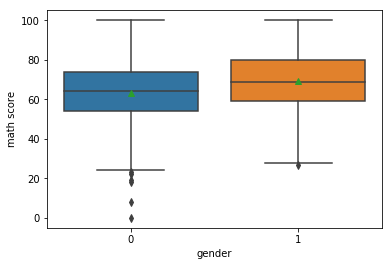

In [53]:
sns.boxplot(x="gender", y="math score", data=sp_data, showmeans=True);

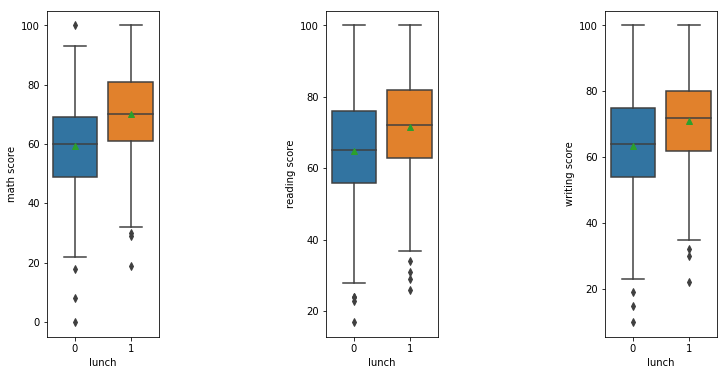

In [54]:
#Grouping by free lunch
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="lunch", y="math score", data=sp_data, ax=axs[0],showmeans=True);
sns.boxplot(x="lunch", y="reading score", data=sp_data, ax=axs[1],showmeans=True);
sns.boxplot(x="lunch", y="writing score", data=sp_data, ax=axs[2],showmeans=True);

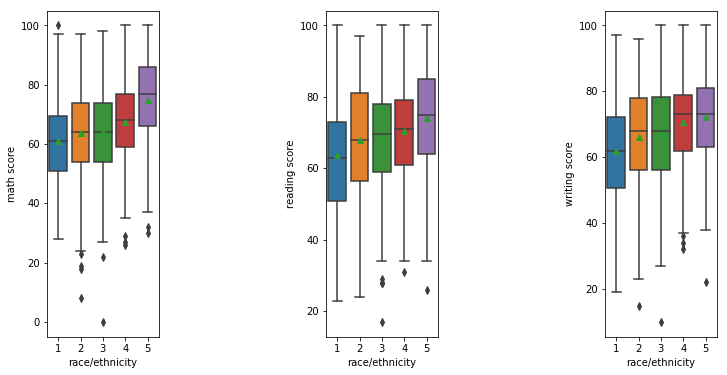

In [55]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="race/ethnicity", y="math score", data=sp_data, ax=axs[0],showmeans=True);
sns.boxplot(x="race/ethnicity", y="reading score", data=sp_data, ax=axs[1],showmeans=True);
sns.boxplot(x="race/ethnicity", y="writing score", data=sp_data, ax=axs[2],showmeans=True);

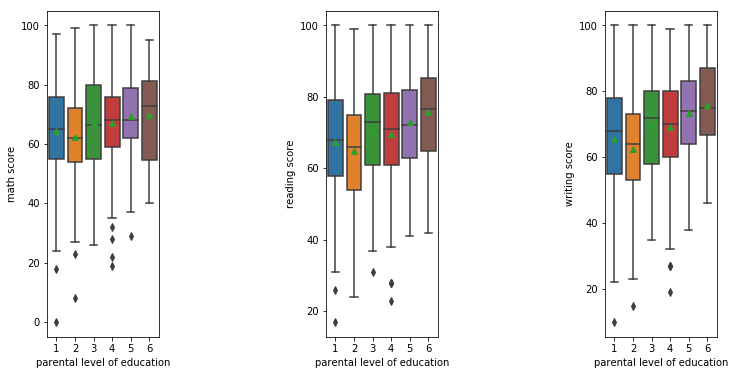

In [56]:
#grouping by parental education levels 
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="parental level of education", y="math score", data=sp_data, ax=axs[0],showmeans=True);
sns.boxplot(x="parental level of education", y="reading score", data=sp_data, ax=axs[1],showmeans=True);
sns.boxplot(x="parental level of education", y="writing score", data=sp_data, ax=axs[2],showmeans=True);

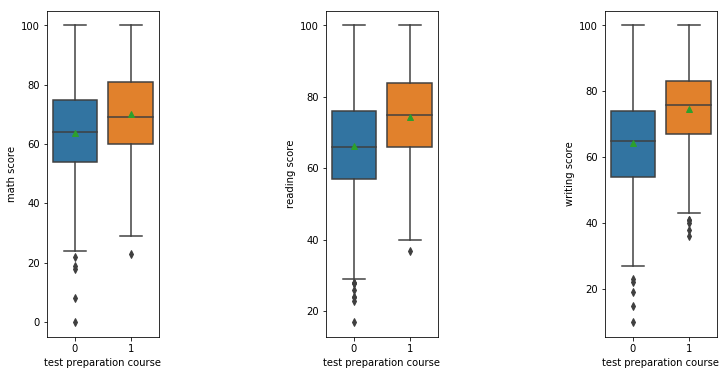

In [57]:
#By test prep class
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="test preparation course", y="math score", data=sp_data, ax=axs[0],showmeans=True);
sns.boxplot(x="test preparation course", y="reading score", data=sp_data, ax=axs[1],showmeans=True);
sns.boxplot(x="test preparation course", y="writing score", data=sp_data, ax=axs[2],showmeans=True);

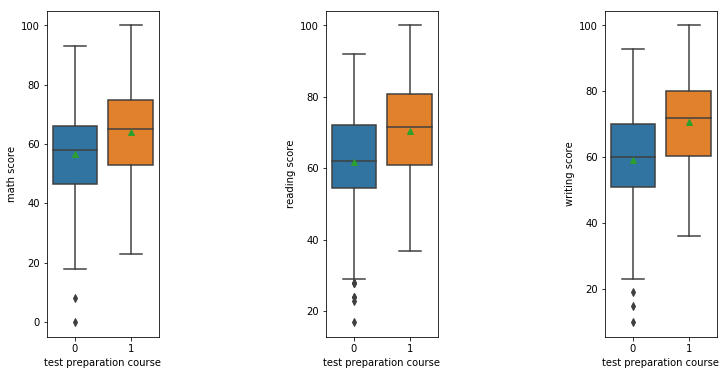

In [58]:
#test prep and lunch
reduced_lunch = sp_data.loc[sp_data['lunch'] == 0]
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="test preparation course", y="math score", data=reduced_lunch, ax=axs[0],showmeans=True);
sns.boxplot(x="test preparation course", y="reading score", data=reduced_lunch, ax=axs[1],showmeans=True);
sns.boxplot(x="test preparation course", y="writing score", data=reduced_lunch, ax=axs[2],showmeans=True);

In [ ]:
#Conclusion
#We see that certain demographic and economic variables like gender, 
#parent's education, and a proxy for household income has an affect on test scores.